# Cluster Analysis - March

## Data Preprocessing

For the purpose of working on the scale of one pc, only one BMS file is examined. Within this file, only one devices of multiple modules is also examined.

In [1]:
import pandas as pd
import glob
import timeit

bms_files = glob.glob('../../Bowland North Model/bms/bms-mar-2017.csv')
bms_meta_df = pd.read_csv('../../Bowland North Model/metadata/planonmeters.csv')

bms_frame_list = []

# timing the loop
start_time = timeit.default_timer()
for file_ in bms_files:
    df = pd.read_csv(file_, header=0)
    df = df[df['device_id'] == '{A69642A1-3855-479C-89F7-DCB47B48FCC0}'] 
    bms_frame_list.append(df)
elapsed = timeit.default_timer() - start_time

bms_df = pd.concat(bms_frame_list)

print("%d rows" % bms_df.shape[0])
print("%.2f seconds" % elapsed)
bms_df.head()

591107 rows
62.61 seconds


,param_name,param_type,param_value,timestamp,device_id,module_key
3107,S,1,52.033276,2017-03-01 00:00:00.130000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
3108,S,1,26.754742,2017-03-01 00:00:00.140000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
3109,S,101,1,2017-03-01 00:00:00.380000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D18
3110,S,101,1,2017-03-01 00:00:00.390000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D3
3111,S,1,100.0,2017-03-01 00:00:00.613000000,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D7


## EDA
### Module Key Dimensions

In [2]:
print("%d unique modules/sensors" % len(bms_df['module_key'].unique()))
bms_df = bms_df[bms_df['param_value'] != "Invalid"]
mod_keys = bms_df['module_key'].unique()
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])

138 unique modules/sensors


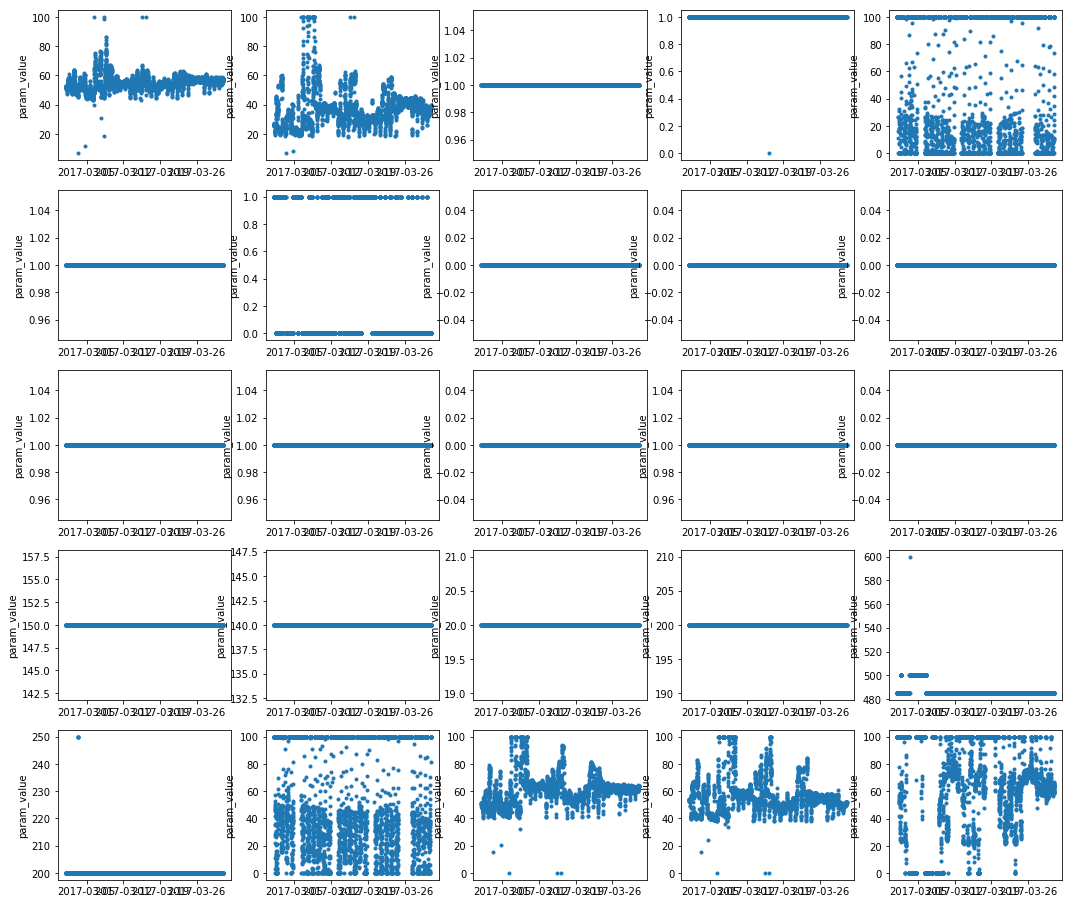

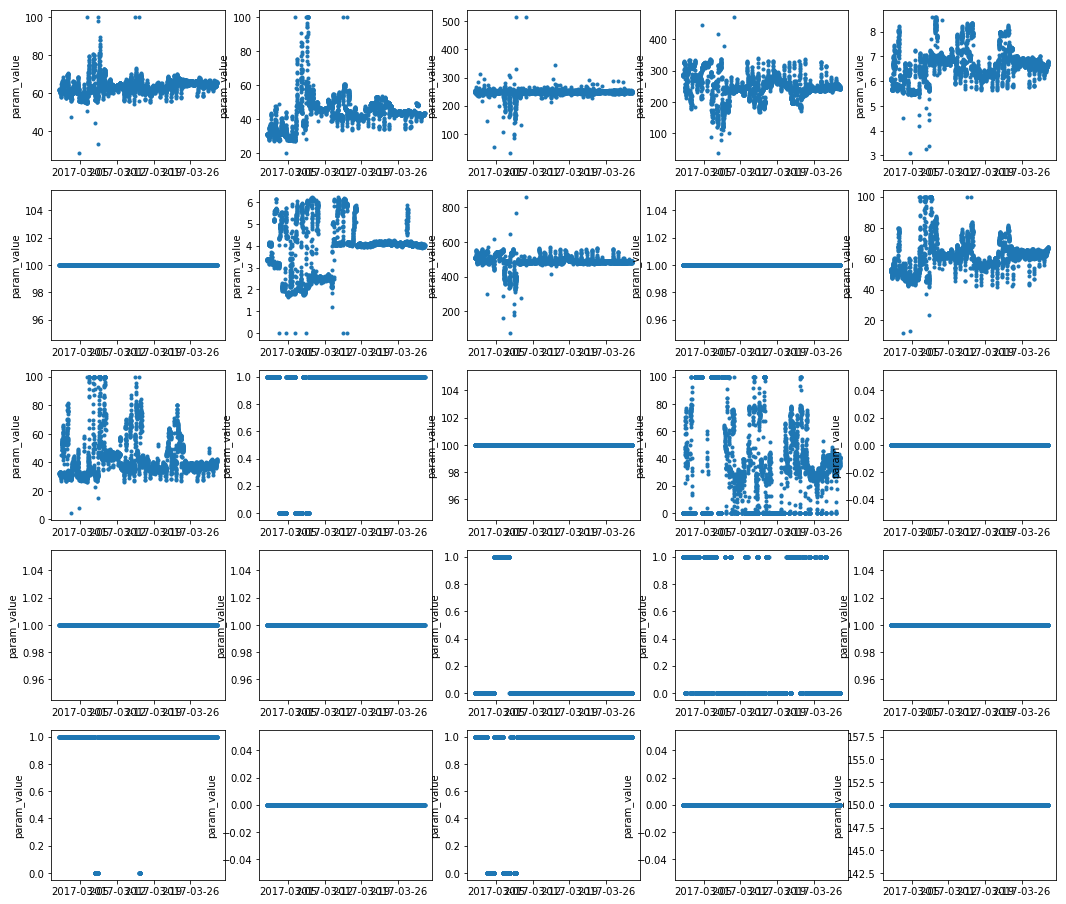

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

i = 1
plt.rcParams["figure.figsize"] = [18, 16]
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1
# plt.savefig('plots/module_samples_raw.png')
i = 1
plt.figure(2) 
for mkey in mod_keys[25:50]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.ylabel("param_value")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

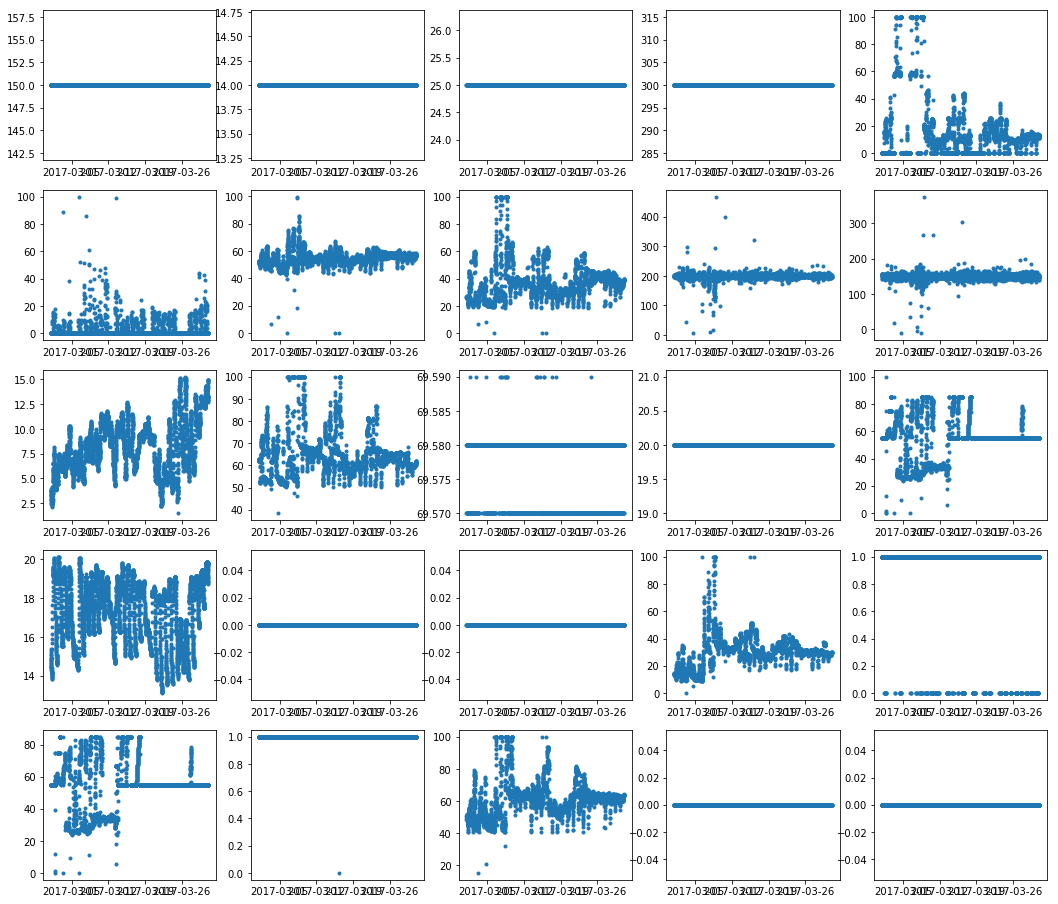

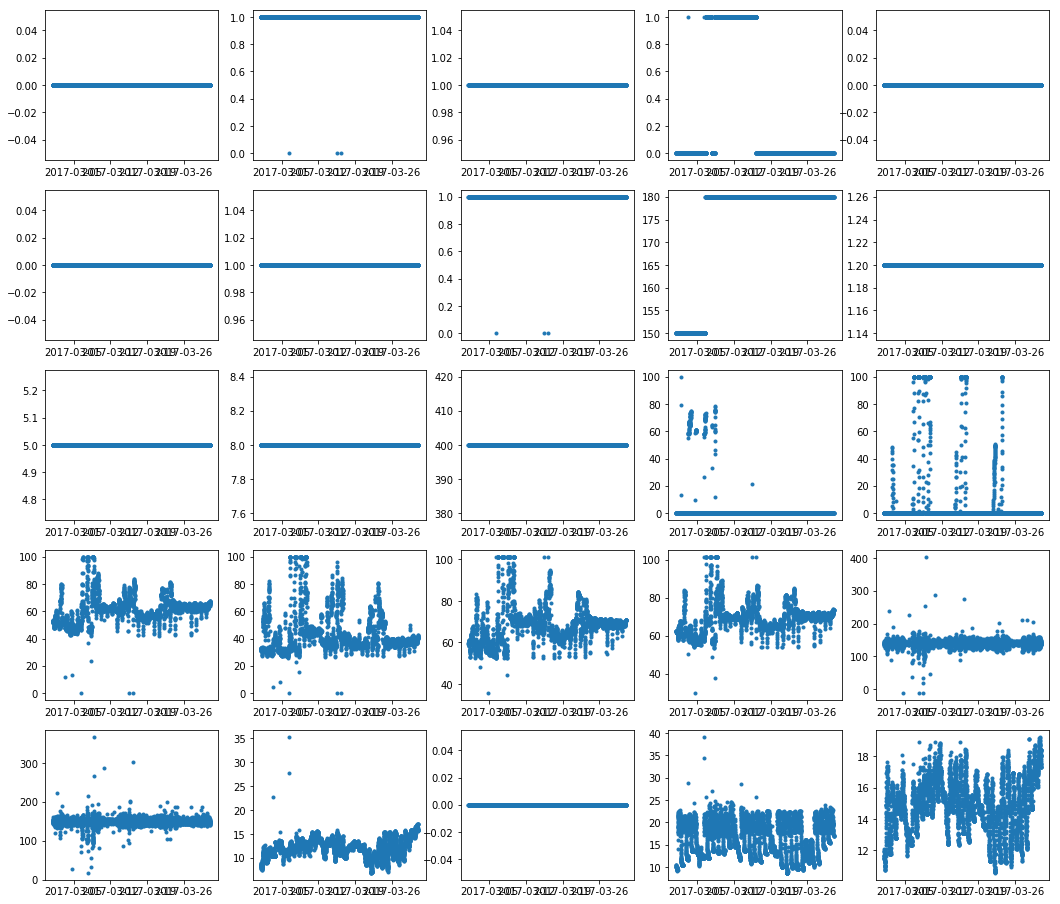

In [4]:
i = 1
plt.figure(1) 
for mkey in mod_keys[50:75]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[75:100]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

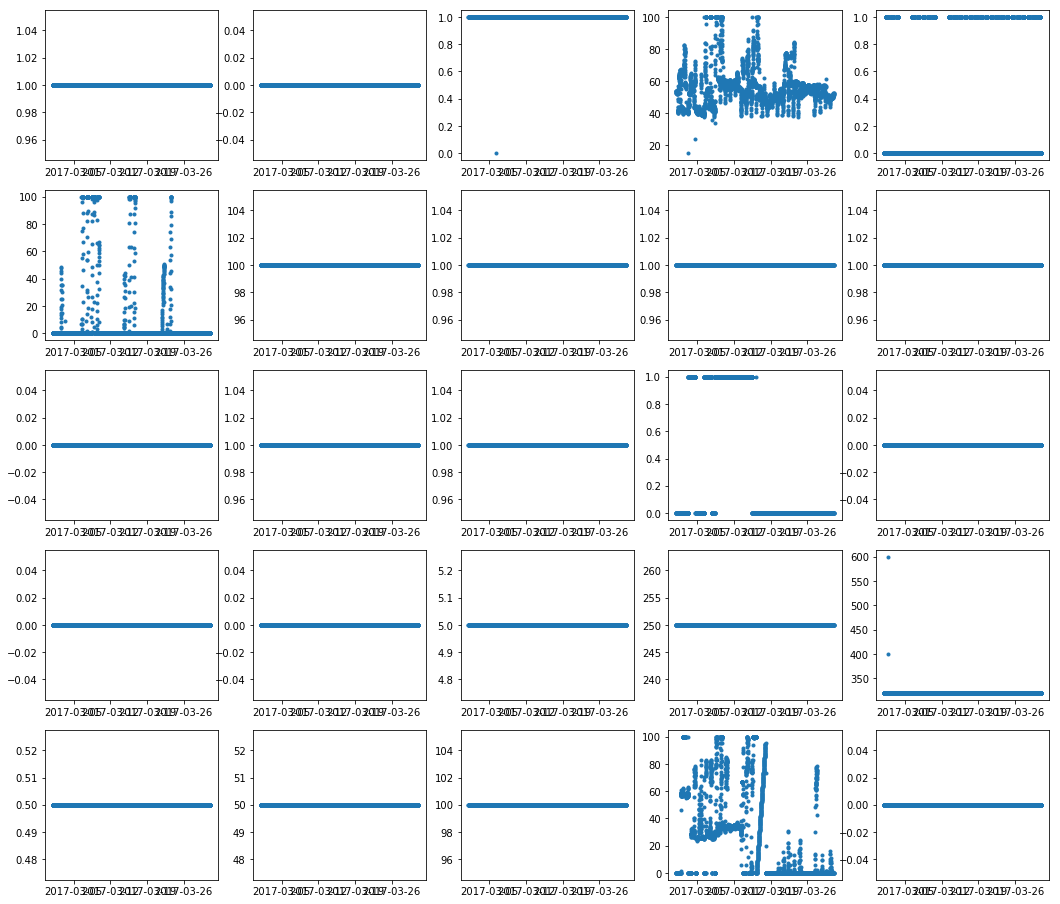

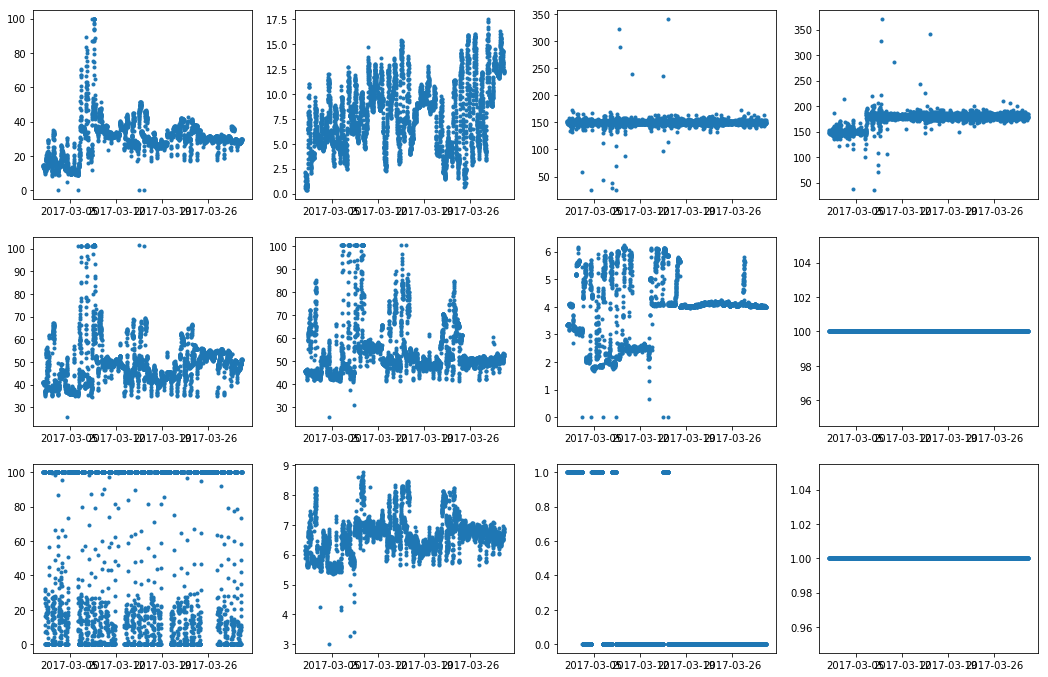

In [5]:
i = 1
plt.figure(1) 
for mkey in mod_keys[100:125]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[125:]:
    plt.subplot(4, 4, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

##### Comparing timescales of sensor readings

In [6]:
bms_df.sort_values('timestamp', inplace=True)
bms_df.groupby('module_key').head(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
7086,S,101,1,2017-03-01 00:00:00.127,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
3107,S,1,52.033276,2017-03-01 00:00:00.130,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
3214,S,1,52.128422,2017-03-01 00:00:00.130,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
6607,S,1,13.776992,2017-03-01 00:00:00.133,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
7087,S,1,52.590694,2017-03-01 00:00:00.137,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
3108,S,1,26.754742,2017-03-01 00:00:00.140,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
3215,S,1,32.235088,2017-03-01 00:00:00.333,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
6608,S,101,1,2017-03-01 00:00:00.370,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16
3109,S,101,1,2017-03-01 00:00:00.380,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D18
7088,S,101,0,2017-03-01 00:00:00.380,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D17


In [7]:
bms_df.groupby('module_key').tail(2)

,param_name,param_type,param_value,timestamp,device_id,module_key
45072963,S,101,1,2017-03-31 00:50:06.173,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1
45067626,S,1,56.218624,2017-03-31 00:50:06.177,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D10
45072456,S,1,67.30732,2017-03-31 00:50:06.187,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D11
45067702,S,1,29.419024,2017-03-31 00:50:06.200,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D12
45072964,S,1,51.909843,2017-03-31 00:50:06.210,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D13
45067627,S,1,39.979549,2017-03-31 00:50:06.223,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D14
45072457,S,1,41.784042,2017-03-31 00:50:06.233,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D15
45067703,S,101,1,2017-03-31 00:50:06.247,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D16
45072965,S,101,0,2017-03-31 00:50:06.257,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D17
45067628,S,101,1,2017-03-31 00:50:06.270,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D18


### Descriptive Statistics

In [9]:
from scipy import stats
import numpy as np

st_df = bms_df[['module_key', 'param_value']]
st_df['param_value'] = pd.to_numeric(st_df['param_value'])
st_df.groupby('module_key')['param_value'].describe().transpose()

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


module_key,D1,D10,D11,D12,D13,D14,D15,D16,D17,D18,...,S7,S8,S9,W1,W2,W3,W4,W5,W6,W7
count,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.000000,4285.0,...,4283.000000,4283.000000,4283.000000,4283.0,4283.0,4283.000000,4283.0,4283.0,4283.0,4283.0
mean,0.999767,54.736125,61.043362,29.901366,56.009772,36.566980,42.701129,0.904317,0.364527,1.0,...,14.904553,6.620235,491.258376,0.0,1.0,0.177913,1.0,0.0,0.0,1.0
std,0.015277,4.876376,9.106578,10.615653,12.497939,12.033167,13.698073,0.294190,0.481354,0.0,...,1.758603,0.615349,31.327405,0.0,0.0,0.382484,0.0,0.0,0.0,0.0
min,0.000000,6.829948,11.793748,0.000000,14.998580,6.979300,4.477798,0.000000,0.000000,1.0,...,10.565151,3.001778,74.250015,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
25%,1.000000,52.380783,55.936871,26.425915,49.196136,29.320457,35.565277,1.000000,0.000000,1.0,...,13.667728,6.268990,483.625000,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
50%,1.000000,54.770535,61.601967,30.212469,54.240078,35.437347,38.484833,1.000000,0.000000,1.0,...,14.905275,6.632613,486.875000,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
75%,1.000000,57.070225,64.850479,34.928307,58.883415,40.753822,45.455425,1.000000,1.000000,1.0,...,16.238689,6.915311,498.687469,0.0,1.0,0.000000,1.0,0.0,0.0,1.0
max,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.0,...,19.236683,8.758243,860.749939,0.0,1.0,1.000000,1.0,0.0,0.0,1.0


Removing the readings with no variation, as well as binary meters.
Sort the remaining by their means and observe patterns.

In [10]:
stats_df = st_df.groupby('module_key')['param_value'].describe()
stats_df = stats_df[stats_df['std'] != 0] # std == 0 gone
stats_df = stats_df[(stats_df['min'] != 0) & (stats_df['max'] != 1)]
stats_df = stats_df[stats_df['min'] != stats_df['max']]
print("%d sensors with variation remain" % stats_df.shape[0])
stats_df.sort_values('mean', inplace=True)

36 sensors with variation remain


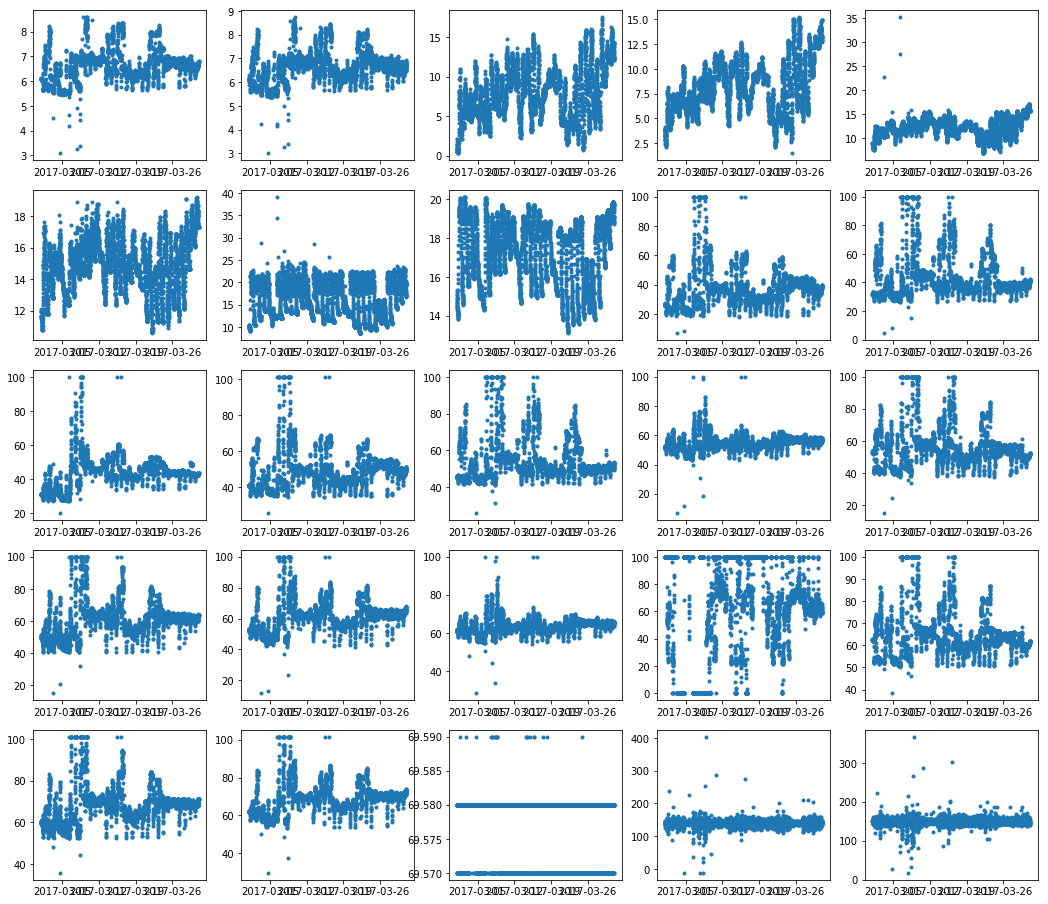

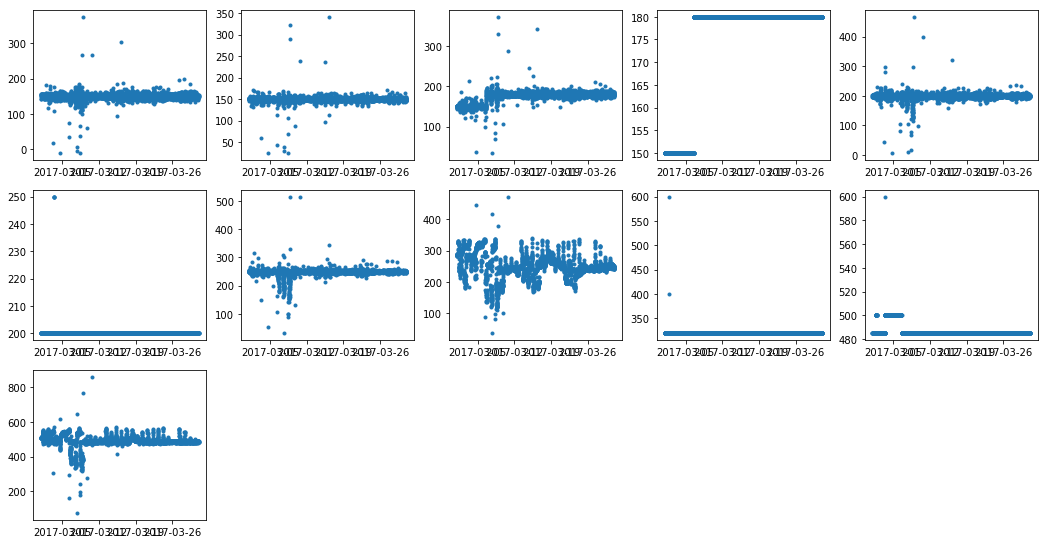

In [11]:
mod_keys = stats_df.index.values

i = 1
plt.figure(1) 
for mkey in mod_keys[:25]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    sensor = sensor[sensor['param_value'] != 'Invalid']
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

i = 1
plt.figure(2) 
for mkey in mod_keys[25:]:
    plt.subplot(5, 5, i)
    sensor = bms_df[bms_df.module_key == mkey]
    sensor = sensor[["timestamp", "param_value"]]
    sensor = sensor.sort_values("timestamp")
    plt.plot_date("timestamp", "param_value", ".", data=sensor)
    i += 1

In [12]:
stats_df

,count,mean,std,min,25%,50%,75%,max
module_key,,,,,,,,
S34,4283.0,6.618352,0.610142,3.091681,6.262150,6.639745,6.896715,8.590986
S8,4283.0,6.620235,0.615349,3.001778,6.268990,6.632613,6.915311,8.758243
S1,4283.0,7.928393,3.296341,0.312881,5.270336,7.897115,10.120680,17.572100
S2,4283.0,8.204336,2.613185,1.497320,6.149111,8.088154,9.941228,15.262594
S3,4283.0,12.153163,1.906850,6.827302,10.922472,12.247164,13.397562,35.294205
S7,4283.0,14.904553,1.758603,10.565151,13.667728,14.905275,16.238689,19.236683
S4,4283.0,16.555946,3.876785,8.670820,13.136108,17.214777,19.772662,39.163170
S6,4283.0,17.316613,1.671787,13.101246,16.051310,17.659252,18.809643,20.134342
D14,4285.0,36.566980,12.033167,6.979300,29.320457,35.437347,40.753822,100.000000


### Naive K-Means

Naive k-means clustering based on summary stats of the sensors of varying readings to provide some initial insight. First the elbow method is employed to observe the clusters that explain the most variance in the data set.
(Naive because it doesn't yet account for weekly perodicity, or other factors that might be of significance, that are not yet accounted for)

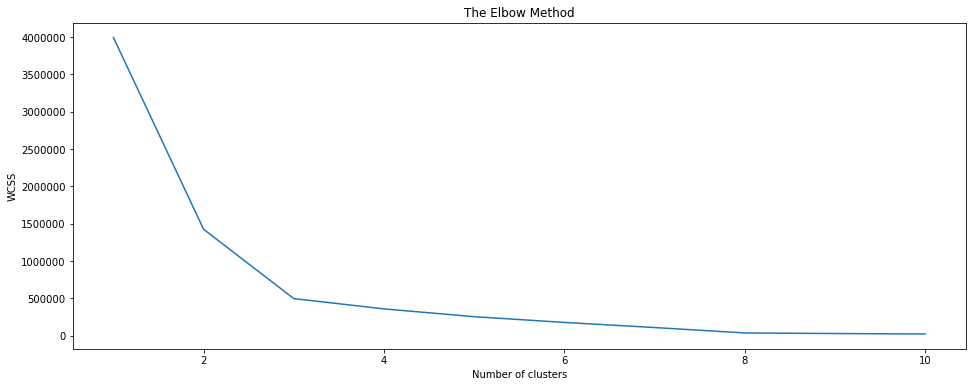

In [13]:
X = stats_df.iloc[:,:].values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

__Three__ clusters account for the most variance.

In [14]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster'] = predicted_cluster_series
stats_df.sort_index()['cluster']

module_key
D10    1
D11    1
D13    1
D14    1
D15    1
D9     1
K12    0
K17    2
K5     2
K9     0
S1     1
S11    1
S12    0
S13    1
S14    0
S15    1
S16    0
S17    1
S18    0
S19    1
S2     1
S20    0
S21    1
S22    0
S23    1
S24    0
S25    1
S26    0
S27    1
S3     1
S34    1
S4     1
S6     1
S7     1
S8     1
S9     2
Name: cluster, dtype: int32

#### Metadata Join
Arrange it by asset code (join with metadata file) to uniquely ID each sensor. A uniqe key is created by joining the _logger asset code_ and the _module key_. This makes it possible to refer to every sensor uniquely, since module keys alone are not unique.

In [15]:
#creating a key on which to join both DataFrames:

bms_meta_df = bms_meta_df[['Logger Channel', 'Logger Asset Code']]
bms_meta_df['key'] = bms_meta_df['Logger Asset Code'] + "/" + bms_meta_df['Logger Channel']
bms_meta_df.columns = ['device_id', 'asset_code', 'key']
bms_df['key'] = bms_df['device_id'] + "/" + bms_df['module_key']

bms_df = bms_df.merge(bms_meta_df, on='key')

bms_df.head()

,param_name,param_type,param_value,timestamp,device_id_x,module_key,key,device_id_y,asset_code
0,S,101,1,2017-03-01 00:00:00.127,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
1,S,101,1,2017-03-01 00:10:01.527,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
2,S,101,1,2017-03-01 00:19:57.397,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
3,S,101,1,2017-03-01 00:29:57.507,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}
4,S,101,1,2017-03-01 00:39:57.267,{A69642A1-3855-479C-89F7-DCB47B48FCC0},D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}/D1,D1,{A69642A1-3855-479C-89F7-DCB47B48FCC0}


## K-means

As a start, examining similarity as a function of euclidean distance via K-means clustering on the original dataset.

In [16]:
import numpy as np

# use only sensors with varying readings
bms_df = bms_df[bms_df.module_key.isin(mod_keys)]
bms_df['timestamp'] = pd.to_datetime(bms_df['timestamp'])
bms_df['hour'] = bms_df['timestamp'].dt.hour
bms_df['day_of_week'] = bms_df['timestamp'].dt.weekday
bms_df['week_of_year'] = bms_df['timestamp'].dt.weekofyear
bms_df['minute'] = bms_df['timestamp'].dt.minute
bms_df['day'] = bms_df['timestamp'].dt.day
bms_df.sort_values('timestamp')
bms_cluster_df = bms_df[['hour', 'minute', 'day_of_week', 'week_of_year', 'param_value' ]]

# remove Invalid reading
bms_cluster_df = bms_cluster_df[bms_cluster_df['param_value'] != 'Invalid']


#Prepare data for clustering
X = bms_cluster_df.iloc[:,:].values

bms_cluster_df.head()

,hour,minute,day_of_week,week_of_year,param_value
4285,0,0,2,9,52.033276
4286,0,10,2,9,51.812645
4287,0,19,2,9,51.980385
4288,0,29,2,9,52.059082
4289,0,39,2,9,52.068794


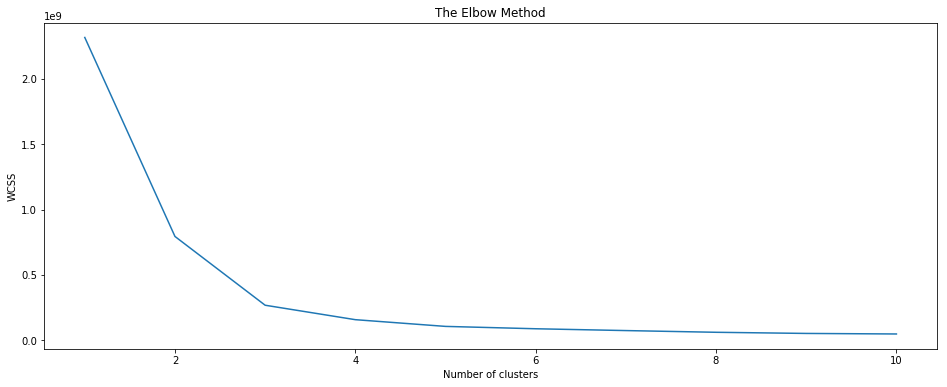

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The most variance is also explained by 3 clusters, using euclidean distance as a similarity metric alone.

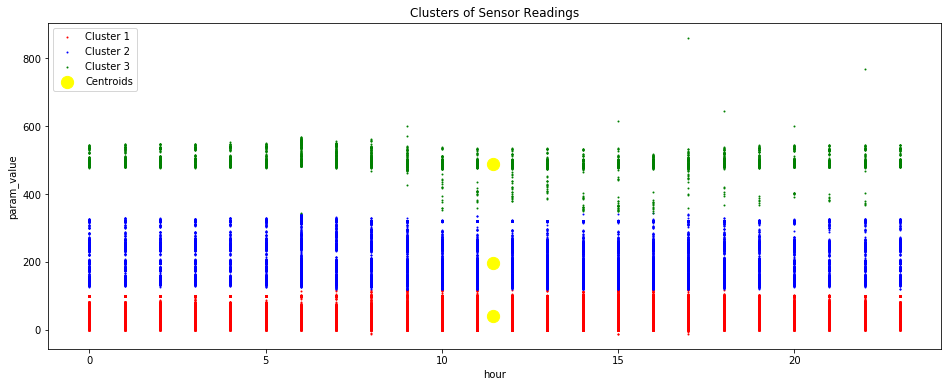

In [18]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 4], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 4], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 4], s = 1, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Sensor Readings')
plt.xlabel('hour')
plt.ylabel('param_value')
plt.rcParams["figure.figsize"] = [16, 6]
plt.legend()
plt.show()

## K-means on weekly aggregated summary statistic dataframe

Comparing the clusters that came out of the k-means clustering for the summary stats data, and the actual bms data, the clustering is about the same. That is, a cluster with mean from 3 - 65, one from 135 - 250, and one from 485+
(extra notes in backup)

making the summary stats across weeks in a month will help to account for some seasonality averages.

In [20]:
bms_df['month_week'] = bms_df['week_of_year'] % 4

In [21]:
st_df2 = bms_df[['module_key', 'param_value', 'month_week']]
st_df2['param_value'] = pd.to_numeric(st_df2['param_value'])
stats_df2 = st_df2.groupby(['module_key', 'month_week'])['param_value'].describe()
stats_df2 = stats_df2[stats_df2['count'].values > 0.0]
stats_df2 = stats_df2.reset_index()
month_stats = []

for i in range(4):
    week_df = stats_df2[stats_df2['month_week'] == i]
    month_stats.append(week_df)

month_stats = [df.set_index('module_key') for df in month_stats]
month_df = pd.concat(month_stats, axis=1)
month_df = month_df.dropna(axis=1, how='any')

month_df = month_df[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] # to remove month_week category
month_df

E:\Anaconda3\envs\dsci\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,count,count,count,count,mean,mean,mean,mean,std,std,...,50%,50%,75%,75%,75%,75%,max,max,max,max
module_key,,,,,,,,,,,,,,,,,,,,,
D10,988.0,1294.0,1002.0,1001.0,56.278662,53.453070,55.649920,53.957528,2.687590,4.427423,...,54.607520,53.506626,58.037457,56.596454,56.748999,55.191448,62.756145,63.970467,100.000000,100.000000
D11,988.0,1294.0,1002.0,1001.0,63.372271,56.522127,64.143530,61.486066,6.170785,7.892842,...,62.528312,59.715698,66.303776,63.251159,64.947134,66.275497,81.558121,80.115105,100.000000,100.000000
D13,988.0,1294.0,1002.0,1001.0,56.377364,51.054140,62.679826,55.376417,7.950343,8.060591,...,58.806120,51.556602,58.341141,56.606768,61.972580,58.220520,84.021065,82.569427,100.000000,100.000000
D14,988.0,1294.0,1002.0,1001.0,38.631774,32.872036,41.793366,34.073874,7.437876,8.933040,...,38.060263,31.336704,43.736913,38.975242,40.777153,36.027786,58.736633,59.985424,100.000000,100.000000
D15,988.0,1294.0,1002.0,1001.0,43.034767,37.244216,48.525807,43.595519,10.020610,8.368052,...,45.079561,38.630165,49.214444,39.155594,47.460046,42.172482,80.552551,81.902588,100.000000,100.000000
D9,988.0,1294.0,1002.0,1001.0,62.463505,55.267287,64.930744,60.730902,6.370968,8.036266,...,63.721153,58.682724,64.387257,61.965987,66.278862,64.365082,81.665588,78.974297,100.000000,100.000000
K12,988.0,1294.0,1002.0,999.0,180.000000,163.377125,177.574850,180.000000,0.000000,14.917716,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
K17,988.0,1294.0,1002.0,999.0,320.000000,320.278207,320.000000,320.000000,0.000000,8.093606,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,600.000000,320.000000,320.000000
K5,988.0,1294.0,1002.0,999.0,485.000000,489.632921,486.182635,485.000000,0.000000,7.547254,...,485.000000,485.000000,485.000000,500.000000,485.000000,485.000000,485.000000,600.000000,500.000000,485.000000


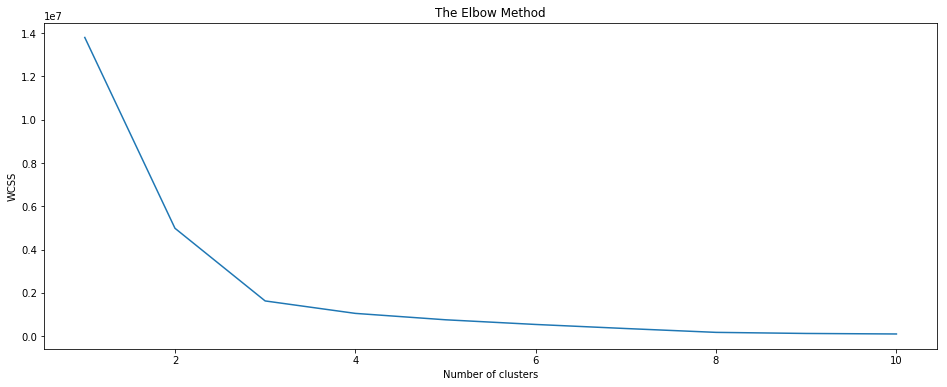

In [22]:
X = month_df.iloc[:,:].values

RANDOM_SEED_KMEANS = 42

# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = RANDOM_SEED_KMEANS)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = [16, 6]
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
predicted_cluster_series = kmeans.fit_predict(X)
stats_df['cluster2'] = predicted_cluster_series
stats_df.sort_index()[['cluster','cluster2']]
stats_df.sort_index()[['cluster','cluster2']].to_csv("kmeans/march_clust.csv")